In [52]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [45]:
df = pd.read_csv('InvestmentData.csv')
df.drop_duplicates(subset=None, keep='first', inplace=False)
df['company_permalink'] = df['company_permalink'].str.lower()
df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [3]:
dc = pd.read_csv('companies.txt',sep='\t')
dc.drop_duplicates(subset=None, keep='first', inplace=False)
dc = dc.rename(columns = {'permalink':'company_permalink'})
dc['company_permalink'] = dc['company_permalink'].str.lower()

In [4]:
dc

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [5]:
#maximum raised amount in entire dataset
df['raised_amount_usd'].max()

21271935000.0

In [6]:
#displaying the third highest raised amount in each funding round type 
df1 = df.sort_values('raised_amount_usd',ascending=False).groupby('funding_round_type')[['raised_amount_usd']].nth(2)

In [7]:
df1['raised_amount_usd'] = df1['raised_amount_usd'].astype('int')

In [8]:
df1

,raised_amount_usd
funding_round_type,
angel,43923865
convertible_note,112000000
debt_financing,3822518000
equity_crowdfunding,25000000
grant,400000000
non_equity_assistance,1561337
post_ipo_debt,2000000000
post_ipo_equity,1662513431
private_equity,2000000000


In [9]:
# Grouping the data on type of funding and calculating sum of raised amount for each funding type 
df2 = df.groupby('funding_round_type', as_index=False)[['funding_round_type','raised_amount_usd']].aggregate(sum)
df2 = df2.sort_values('raised_amount_usd',ascending=False)

In [10]:
#Displaying the funding type with the respective raised amounts in decreasing order 
df2['raised_amount_usd'] = df2['raised_amount_usd'].astype('int')
df2

,funding_round_type,raised_amount_usd
13,venture,590126216876
8,private_equity,141925436105
2,debt_financing,113884840886
7,post_ipo_equity,51610606151
12,undisclosed,30441429697
6,post_ipo_debt,25643094917
11,seed,16989864181
4,grant,9134424145
0,angel,4659255123
10,secondary_market,2389488903


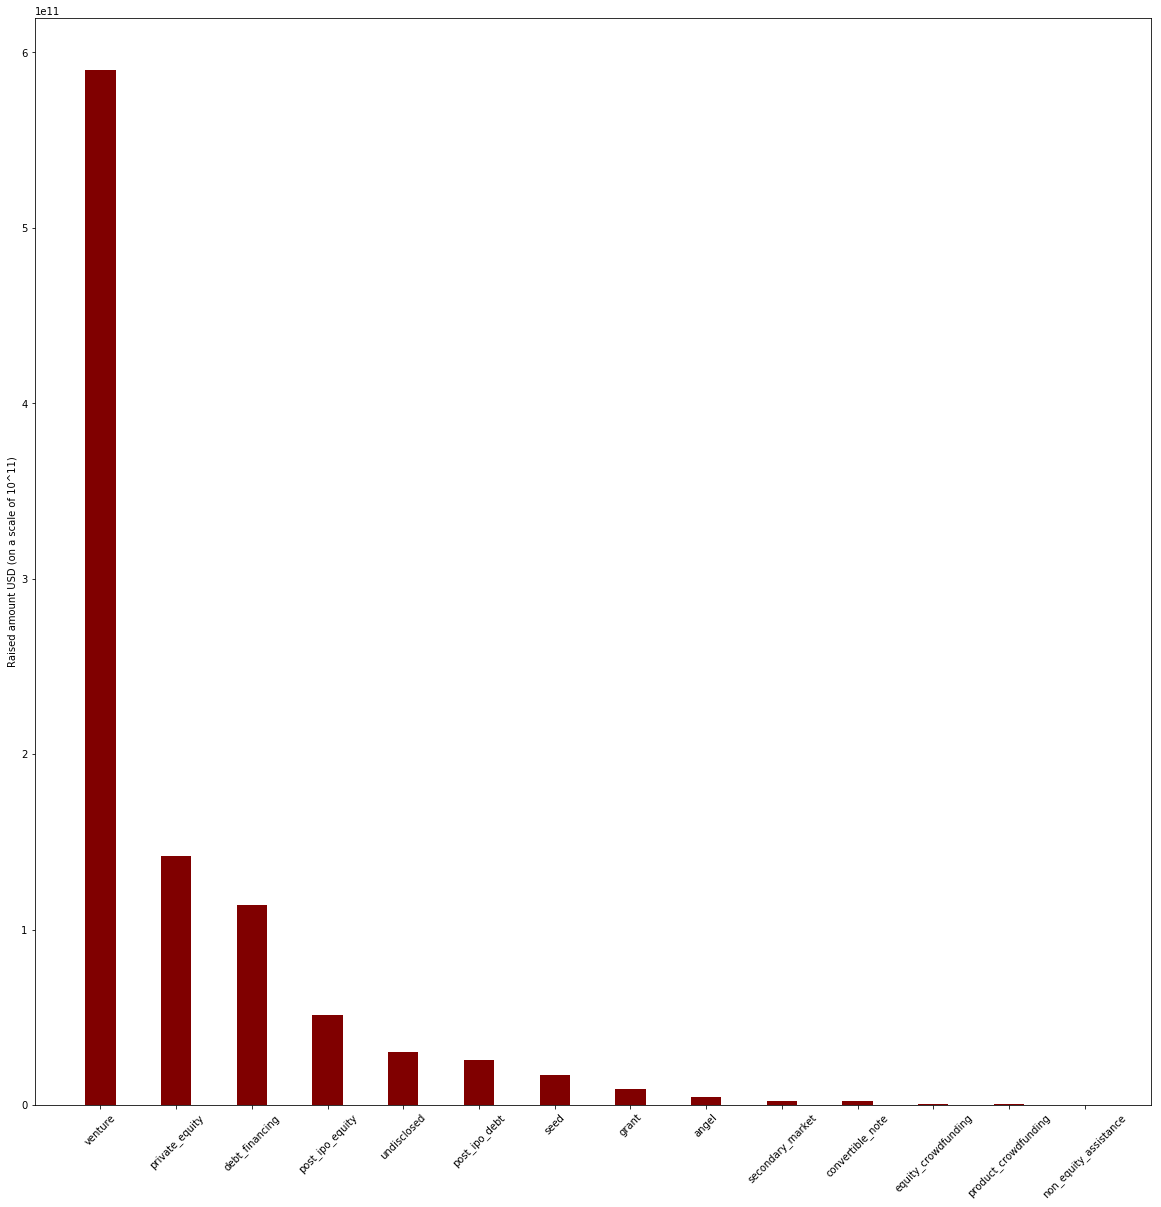

In [11]:
#Plotting a bar graph for funding type v/s amount raised
fig = plt.figure(figsize =(20, 20))
plt.bar(df2['funding_round_type'],df2['raised_amount_usd'], color ='maroon',
        width = 0.4)
plt.xticks(rotation=45)
plt.ylabel('Raised amount USD (on a scale of 10^11)')
plt.show()

In [12]:
#The most suitable funding type 
df2[df2['raised_amount_usd']==df2['raised_amount_usd'].max()]

,funding_round_type,raised_amount_usd
13,venture,590126216876


In [46]:
merged_df = pd.merge(df, dc, on='company_permalink', how='inner')
merged_df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [14]:
#filtering the merged dataframe to filter out the dataframe rows where funding_round_type is "venture"
df3 = merged_df[merged_df['funding_round_type']=='venture']

In [15]:
df4 = df3.groupby('country_code', as_index=False)[['country_code','raised_amount_usd']].aggregate(sum)

In [16]:
df4['raised_amount_usd'] = df4['raised_amount_usd'].astype('int')
df4 = df4.sort_values('raised_amount_usd',ascending=False)
df4.head(5)

,country_code,raised_amount_usd
100,USA,422510842796
16,CHN,39835418773
31,GBR,20245627416
41,IND,14391858718
13,CAN,9583332317


In [17]:
dc

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


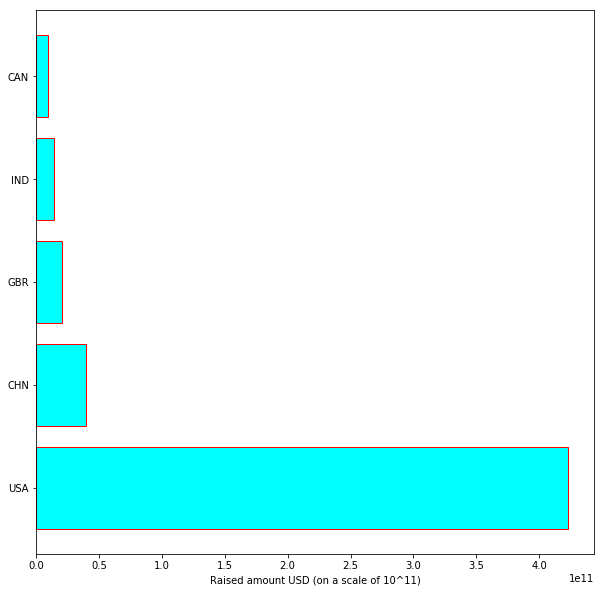

In [18]:
#horizontal bar graph displaying the top 5 countries with the most raised amount in venture round
fig = plt.figure(figsize =(10, 10))
plt.barh(df4['country_code'].head(5),df4['raised_amount_usd'].head(5), color='cyan', edgecolor = 'red')
plt.xlabel('Raised amount USD (on a scale of 10^11)')
plt.show()

In [19]:
#calculating the category_list(pipe separated sectors) wise sum of total raised amount in venture round for USA
df5 = df3[df3['country_code']=='USA']
df5 = df5.groupby('category_list', as_index=False)[['category_list','raised_amount_usd']].aggregate(sum)
df5['raised_amount_usd'] = df5['raised_amount_usd'].astype('int')
df5 = df5.sort_values('raised_amount_usd',ascending=False)

In [20]:
df5

,category_list,raised_amount_usd
2180,Biotechnology,46383018300
7392,Semiconductors,25318963434
7469,Software,20615387679
2836,Clean Technology,13718386003
6106,Health Care,12602926563
5273,Enterprise Software,8633524833
6927,Mobile,7085837413
2233,Biotechnology|Health Care,6970137297
6016,Hardware + Software,6335114135
1757,Automotive|Design|Limousines|Public Transporta...,5306000000


In [21]:
#spliting the pipe separated category list column in separate rows to calculate sector wise total funding in venture round
df_sec = pd.DataFrame(df5.category_list.str.split('|').tolist(), index=([df5.raised_amount_usd])).stack()
df_sec = df_sec.reset_index()[[0, 'raised_amount_usd']]
df_sec.columns = ['sectors', 'raised_amount_usd']
df_sec = df_sec.groupby('sectors', as_index=False)[['sectors','raised_amount_usd']].aggregate(sum)

In [22]:
df_sec = df_sec.sort_values('raised_amount_usd',ascending=False)
df_sec

,sectors,raised_amount_usd
63,Biotechnology,67831875951
672,Software,56371259413
324,Health Care,32905198297
244,Enterprise Software,32282113374
449,Mobile,29264525681
627,Semiconductors,29123697090
9,Advertising,22486055711
100,Clean Technology,21701287123
207,E-Commerce,17387616314
705,Technology,15683527303


# Converting the above few line to a function to do the task that was performed for USA for other top countries in the venture round:

In [23]:
def display_country_wise_sector(x):
    #calculating the category_list(pipe separated sectors) wise sum of total raised amount
    
    df5 = df3[df3['country_code']==x]
    df5 = df5.groupby('category_list', as_index=False)[['category_list','raised_amount_usd']].aggregate(sum)
    df5['raised_amount_usd'] = df5['raised_amount_usd'].astype('int')
    df5 = df5.sort_values('raised_amount_usd',ascending=False)
    
    #spliting the pipe separated category list column in separate rows to calculate sector wise total funding in venture round

    df_sec = pd.DataFrame(df5.category_list.str.split('|').tolist(), index=([df5.raised_amount_usd])).stack()
    df_sec = df_sec.reset_index()[[0, 'raised_amount_usd']]
    df_sec.columns = ['sectors', 'raised_amount_usd']
    df_sec = df_sec.groupby('sectors', as_index=False)[['sectors','raised_amount_usd']].aggregate(sum)
    df_sec = df_sec.sort_values('raised_amount_usd',ascending=False)
    return df_sec


Text(0.5,1,'GBR')

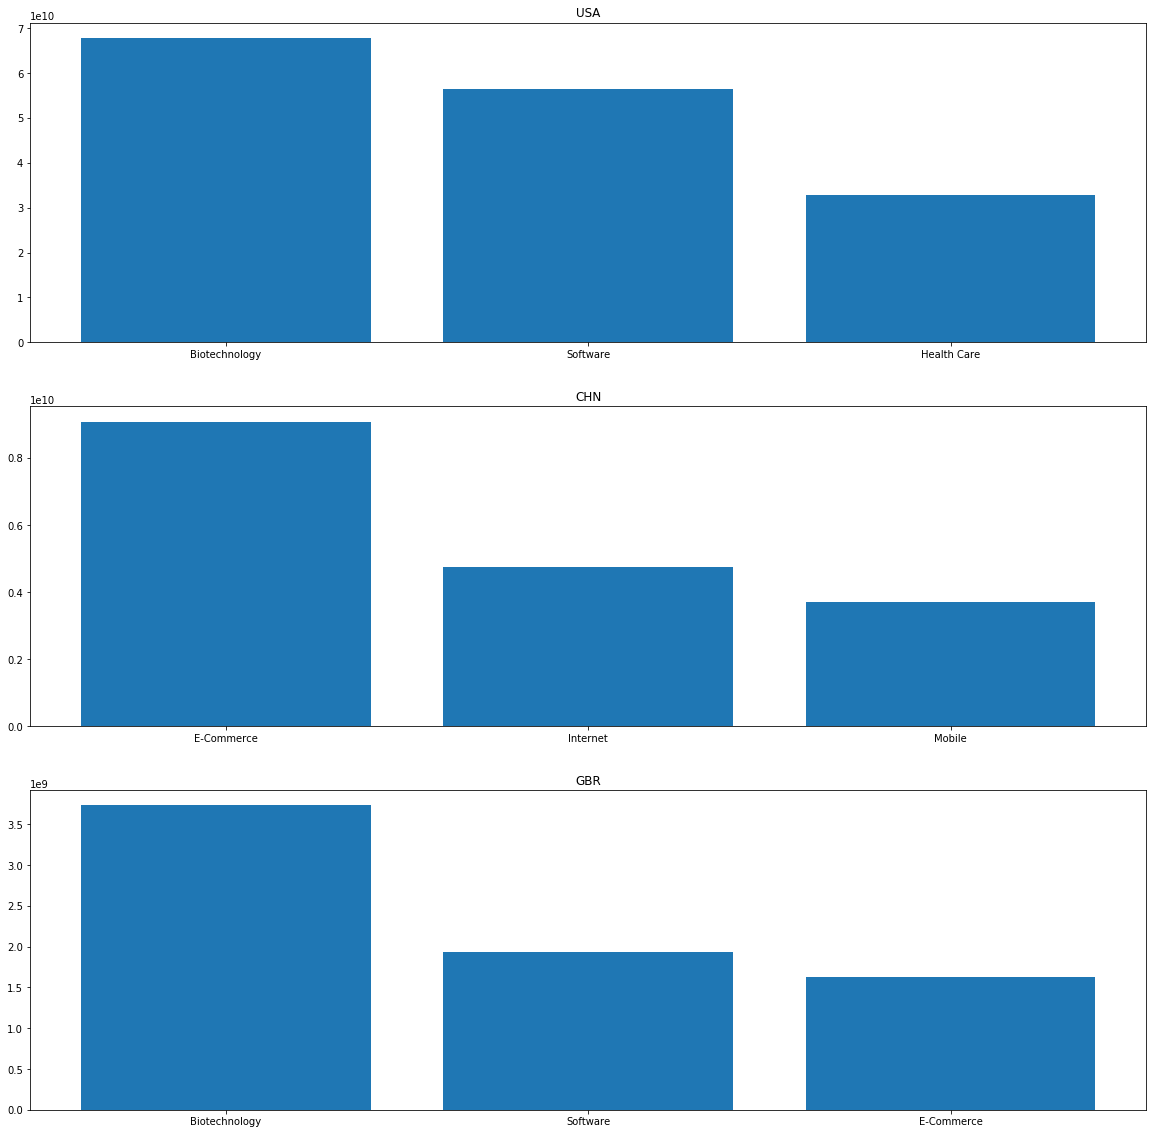

In [44]:
#Plotting bar graph for top 3 funded sectors in the top 3 countries in the venture round

fig, axes = plt.subplots(3, 1, figsize=(20, 20))
i = 0
for coun in df4['country_code'].head(3):
    res_df = display_country_wise_sector(coun)
    axes[i].bar(res_df['sectors'].head(3),res_df['raised_amount_usd'].head(3))
    i = i+1
axes[0].set_title("USA")
axes[1].set_title("CHN")
axes[2].set_title("GBR")

In [104]:
x = merged_df[['funding_round_type','raised_amount_usd','category_list','status','country_code','state_code','region','city']]

In [105]:
x_categorical = ['funding_round_type','category_list','status','country_code','state_code','region','city']

In [106]:
#label encoding the categorical columns
labelencoder = LabelEncoder()

In [110]:
for col in x_categorical:
    x[col] = x[col].astype('category')
    x[col] = x[col].cat.codes

In [111]:
x['raised_amount_usd'] = x['raised_amount_usd'].replace(np.nan,0)

In [112]:
##Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Using the elbow method to determine the optimal number of clusters for k-means clustering

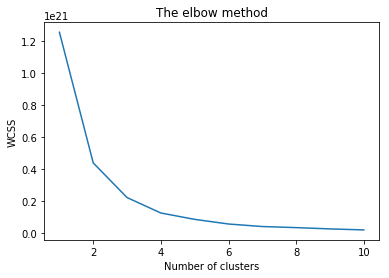

In [113]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [114]:
kmeans = KMeans(n_clusters=4,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier

In [115]:
y_kmeans = kmeans.fit_predict(x)

In [116]:
#Appending the cluster labels to the merged_df indicating the cluster a particular data point belongs to
merged_df['cluster'] = y_kmeans

# Analyzing for cluster 0

In [118]:
df = merged_df[merged_df.cluster==0]

In [119]:
#displaying the third highest raised amount in each funding round type for each cluster 
df1 = df.sort_values('raised_amount_usd',ascending=False).groupby('funding_round_type')[['raised_amount_usd']].nth(2)

df1['raised_amount_usd'] = df1['raised_amount_usd'].astype('int')

df1

,raised_amount_usd
funding_round_type,
angel,40000000
convertible_note,112000000
debt_financing,316000000
equity_crowdfunding,25000000
grant,227287716
non_equity_assistance,1561337
post_ipo_debt,240000000
post_ipo_equity,264000000
private_equity,322282099


In [120]:
# Grouping the data on type of funding and calculating sum of raised amount for each funding type 
df2 = df.groupby('funding_round_type', as_index=False)[['funding_round_type','raised_amount_usd']].aggregate(sum)
df2 = df2.sort_values('raised_amount_usd',ascending=False)

#Displaying the funding type with the respective raised amounts in decreasing order 
df2['raised_amount_usd'] = df2['raised_amount_usd'].astype('int')
df2

,funding_round_type,raised_amount_usd
13,venture,529970498923
8,private_equity,86924022085
2,debt_financing,49693233323
7,post_ipo_equity,18364183117
11,seed,16981609956
12,undisclosed,13098620425
4,grant,7572280225
6,post_ipo_debt,5427344917
0,angel,4164743131
1,convertible_note,2103082414


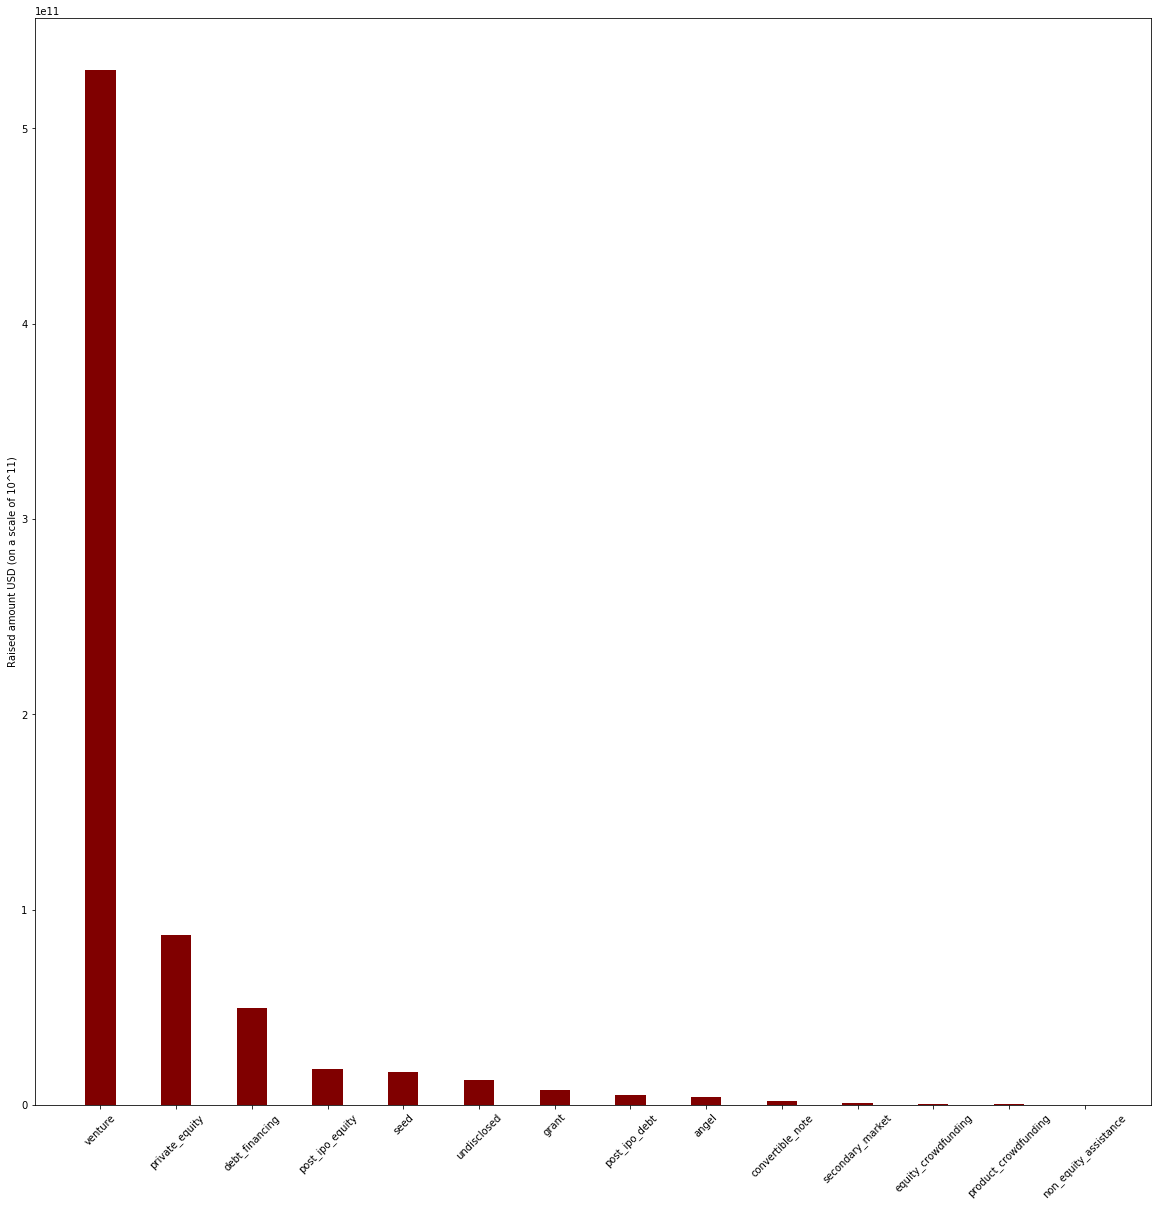

In [121]:
#Plotting a bar graph for funding type v/s amount raised
fig = plt.figure(figsize =(20, 20))
plt.bar(df2['funding_round_type'],df2['raised_amount_usd'], color ='maroon',
        width = 0.4)
plt.xticks(rotation=45)
plt.ylabel('Raised amount USD (on a scale of 10^11)')
plt.show()


In [122]:
#The most suitable funding type 
df2[df2['raised_amount_usd']==df2['raised_amount_usd'].max()]

,funding_round_type,raised_amount_usd
13,venture,529970498923


In [123]:
#filtering the merged dataframe to filter out the dataframe rows where funding_round_type is "venture"
df3 = df[df['funding_round_type']=='venture']

df4 = df3.groupby('country_code', as_index=False)[['country_code','raised_amount_usd']].aggregate(sum)

df4['raised_amount_usd'] = df4['raised_amount_usd'].astype('int')
df4 = df4.sort_values('raised_amount_usd',ascending=False)
df4.head(5)

,country_code,raised_amount_usd
100,USA,379182820269
16,CHN,31866418773
31,GBR,18830627416
41,IND,11791858718
13,CAN,9583332317


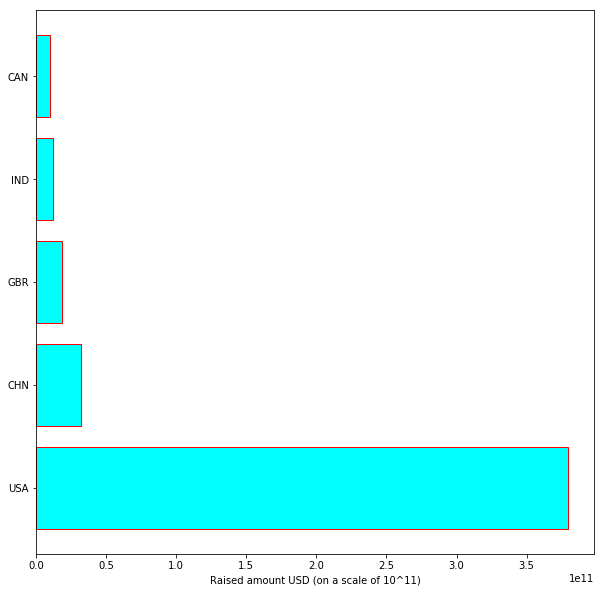

In [124]:
#horizontal bar graph displaying the top 5 countries with the most raised amount in venture round
fig = plt.figure(figsize =(10, 10))
plt.barh(df4['country_code'].head(5),df4['raised_amount_usd'].head(5), color='cyan', edgecolor = 'red')
plt.xlabel('Raised amount USD (on a scale of 10^11)')
plt.show()

In [185]:
#calculating the category_list(pipe separated sectors) wise sum of total raised amount in venture round for USA
df5 = df3[df3['country_code']=='USA']
df5 = df5.groupby('category_list', as_index=False)[['category_list','raised_amount_usd']].aggregate(sum)
df5['raised_amount_usd'] = df5['raised_amount_usd'].astype('int')
df5 = df5.sort_values('raised_amount_usd',ascending=False)


In [126]:
#spliting the pipe separated category list column in separate rows to calculate sector wise total funding in venture round
df_sec = pd.DataFrame(df5.category_list.str.split('|').tolist(), index=([df5.raised_amount_usd])).stack()
df_sec = df_sec.reset_index()[[0, 'raised_amount_usd']]
df_sec.columns = ['sectors', 'raised_amount_usd']
df_sec = df_sec.groupby('sectors', as_index=False)[['sectors','raised_amount_usd']].aggregate(sum)

df_sec = df_sec.sort_values('raised_amount_usd',ascending=False)
df_sec

,sectors,raised_amount_usd
63,Biotechnology,66576032755
672,Software,54701259413
324,Health Care,32055394801
244,Enterprise Software,31042113374
449,Mobile,27202925681
100,Clean Technology,20931287123
9,Advertising,16836055711
207,E-Commerce,16137616314
21,Analytics,14896239036
705,Technology,12912592972


Text(0.5,1,'GBR')

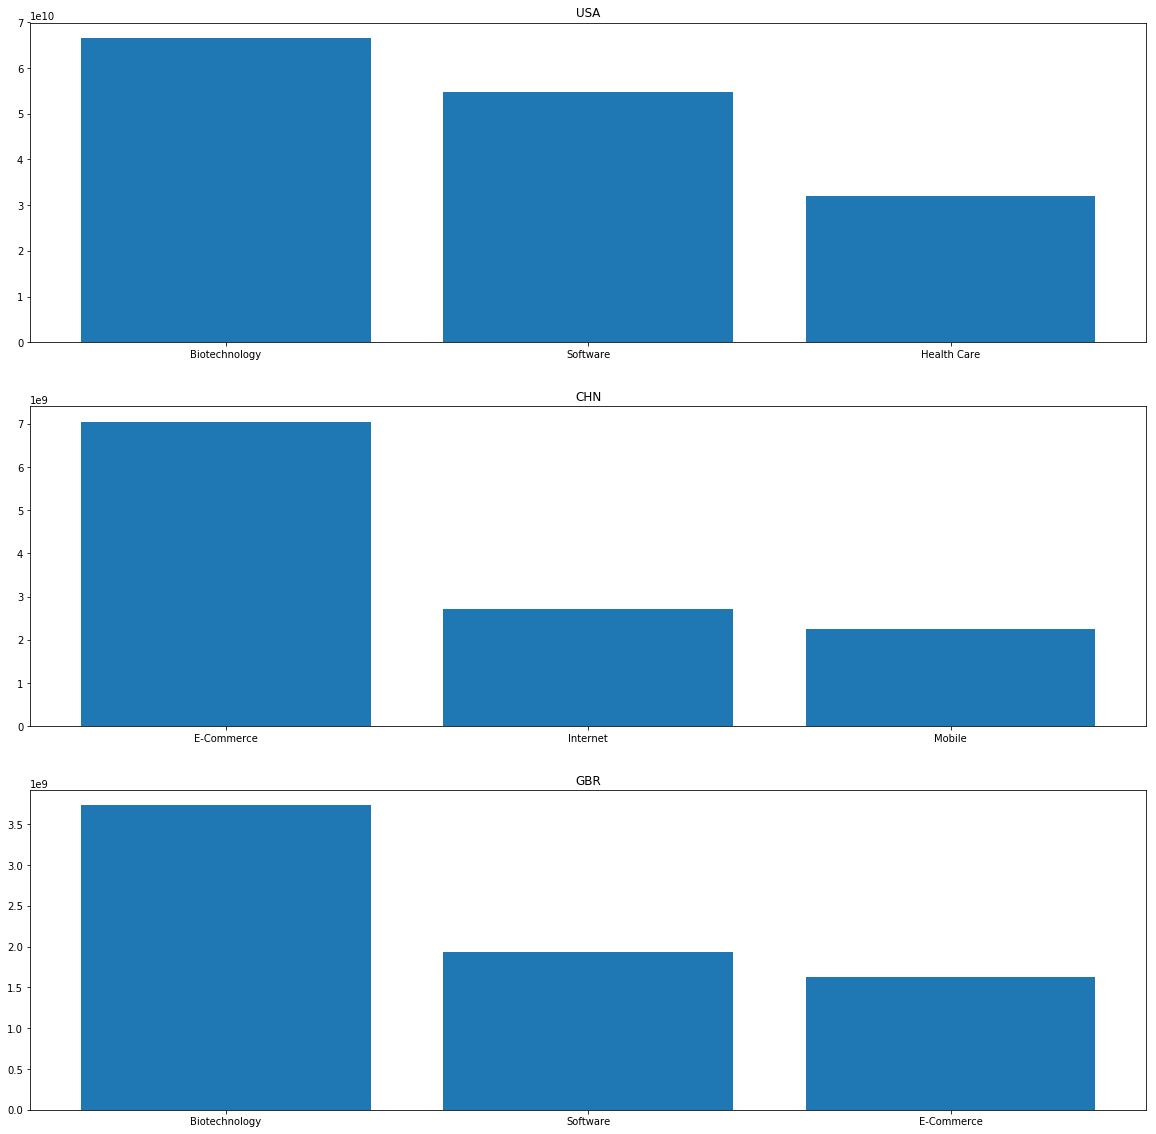

In [128]:
#Plotting bar graph for top 3 funded sectors in the top 3 countries in the venture round

fig, axes = plt.subplots(3, 1, figsize=(20, 20))
i = 0
for coun in df4['country_code'].head(3):
    res_df = display_country_wise_sector(coun)
    axes[i].bar(res_df['sectors'].head(3),res_df['raised_amount_usd'].head(3))
    i = i+1
axes[0].set_title("USA")
axes[1].set_title("CHN")
axes[2].set_title("GBR")

# Analyzing for cluster 1 

In [131]:
# Analyzing for cluster 1

df = merged_df[merged_df.cluster==1]
df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,cluster
37560,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,NaN,21-10-2006,1.760000e+10,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953,1
106529,/organization/verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,2.127194e+10,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,1


In [130]:
#displaying the third highest raised amount in each funding round type for each cluster 
df1 = df.sort_values('raised_amount_usd',ascending=False).groupby('funding_round_type')[['raised_amount_usd']].nth(2)

df1['raised_amount_usd'] = df1['raised_amount_usd'].astype('int')

df1

,raised_amount_usd
funding_round_type,


# There are only two data points in the cluster 1. Hence dataframe will give empty result when we try to get 3rd highest raised amount


In [132]:
# Grouping the data on type of funding and calculating sum of raised amount for each funding type 
df2 = df.groupby('funding_round_type', as_index=False)[['funding_round_type','raised_amount_usd']].aggregate(sum)
df2 = df2.sort_values('raised_amount_usd',ascending=False)

In [133]:
#Displaying the funding type with the respective raised amounts in decreasing order 
df2['raised_amount_usd'] = df2['raised_amount_usd'].astype('int')
df2

,funding_round_type,raised_amount_usd
0,debt_financing,21271935000
1,venture,17600000000


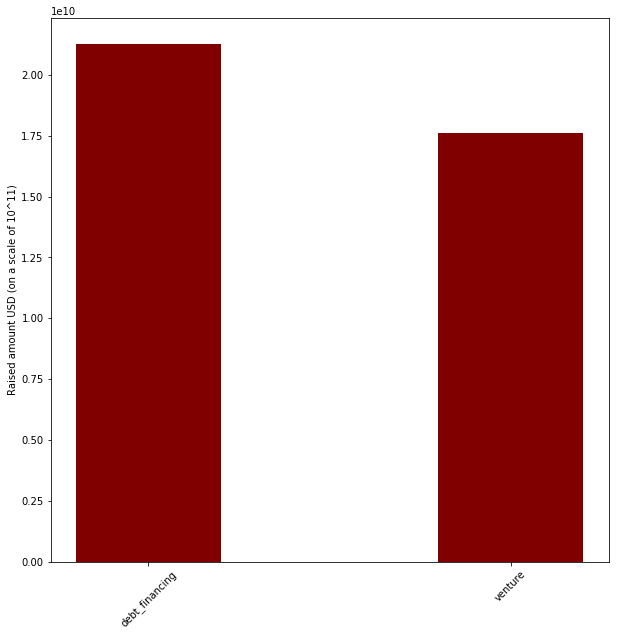

In [136]:
#Plotting a bar graph for funding type v/s amount raised
fig = plt.figure(figsize =(10, 10))
plt.bar(df2['funding_round_type'],df2['raised_amount_usd'], color ='maroon',
        width = 0.4)
plt.xticks(rotation=45)
plt.ylabel('Raised amount USD (on a scale of 10^10)')
plt.show()

In [137]:
#The most suitable funding type 
df2[df2['raised_amount_usd']==df2['raised_amount_usd'].max()]

,funding_round_type,raised_amount_usd
0,debt_financing,21271935000


In [138]:
#filtering the merged dataframe to filter out the dataframe rows where funding_round_type is "debt_financing"
df3 = df[df['funding_round_type']=='debt_financing']

df4 = df3.groupby('country_code', as_index=False)[['country_code','raised_amount_usd']].aggregate(sum)

df4['raised_amount_usd'] = df4['raised_amount_usd'].astype('int')
df4 = df4.sort_values('raised_amount_usd',ascending=False)
df4.head(5)

,country_code,raised_amount_usd
0,USA,21271935000


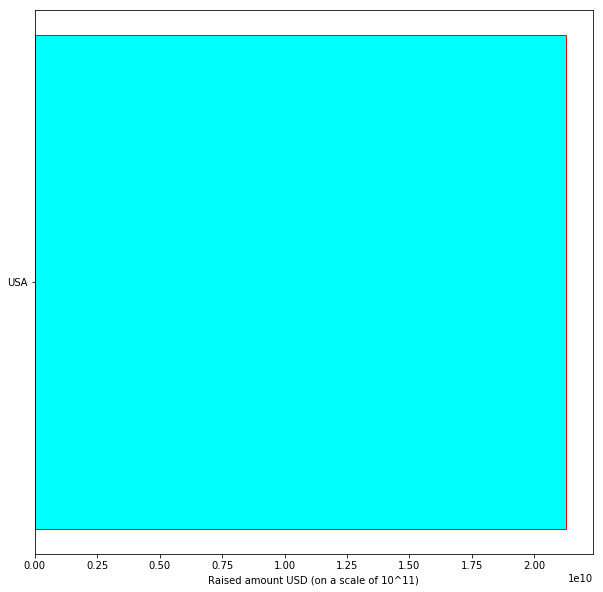

In [139]:
#horizontal bar graph displaying the top 5 countries with the most raised amount in debt_financing round
fig = plt.figure(figsize =(10, 10))
plt.barh(df4['country_code'].head(5),df4['raised_amount_usd'].head(5), color='cyan', edgecolor = 'red')
plt.xlabel('Raised amount USD (on a scale of 10^10)')
plt.show()

In [140]:
#calculating the category_list(pipe separated sectors) wise sum of total raised amount in debt_financing round for USA
df5 = df3[df3['country_code']=='USA']
df5 = df5.groupby('category_list', as_index=False)[['category_list','raised_amount_usd']].aggregate(sum)
df5['raised_amount_usd'] = df5['raised_amount_usd'].astype('int')
df5 = df5.sort_values('raised_amount_usd',ascending=False)

df5

,category_list,raised_amount_usd
0,Communications Infrastructure|Information Tech...,21271935000


In [142]:
#spliting the pipe separated category list column in separate rows to calculate sector wise total funding in debt_financing round
df_sec = pd.DataFrame(df5.category_list.str.split('|').tolist(), index=([df5.raised_amount_usd])).stack()
df_sec = df_sec.reset_index()[[0, 'raised_amount_usd']]
df_sec.columns = ['sectors', 'raised_amount_usd']
df_sec = df_sec.groupby('sectors', as_index=False)[['sectors','raised_amount_usd']].aggregate(sum)

df_sec = df_sec.sort_values('raised_amount_usd',ascending=False)
df_sec

,sectors,raised_amount_usd
0,Communications Infrastructure,21271935000
1,Information Technology,21271935000
2,Mobile,21271935000


Text(0,0.5,'Raised amount USD (on a scale of 10^10)')

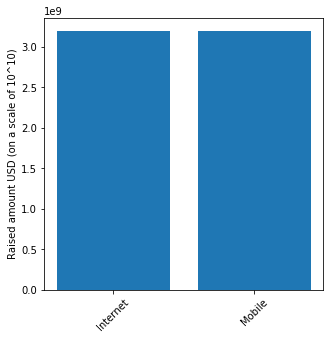

In [162]:
#Plotting bar graph for top 3 funded sectors in USA in the debt_financing round

fig = plt.figure(figsize =(5, 5))

res_df = display_country_wise_sector(coun)
plt.bar(res_df['sectors'].head(3),res_df['raised_amount_usd'].head(3))
plt.xticks(rotation=45)

plt.ylabel('Raised amount USD (on a scale of 10^10)')


# Analyzing for cluster 2

In [163]:
# Analyzing for cluster 2

df = merged_df[merged_df.cluster==2]
df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,cluster
16466,/organization/cambridge-technology-group,/funding-round/896482503c37ea60a54dda3cd7a323d6,post_ipo_equity,NaN,01-01-2000,1.066494e+10,Cambridge Technology Group,NaN,Consulting|Product Development Services|Produc...,operating,NaN,NaN,NaN,NaN,01-01-1988,2
16470,/organization/cambridge-technology-partners-ctp,/funding-round/38c4e6a4046032a047be1ef06c28b06e,undisclosed,NaN,01-01-2001,5.000000e+09,Cambridge Technology Partners (CTP),NaN,Architecture|Banking|Finance,ipo,NaN,NaN,NaN,NaN,11-01-1990,2
18957,/organization/charter-communications,/funding-round/6116d086807f9ad517f05d50bed55db5,post_ipo_debt,NaN,15-09-2014,3.500000e+09,Charter Communications,http://www.charter.com,Internet|Telecommunications|Television|Video,ipo,USA,CT,Hartford,Stamford,01-01-1993,2
20536,/organization/clearwire,/funding-round/d244701f8da43da8a48e4c0403380084,post_ipo_equity,NaN,06-05-2008,3.200000e+09,Clearwire,http://www.clearwire.com,Internet|Mobile,acquired,USA,WA,Seattle,Kirkland,01-10-2003,2
21670,/organization/cofco,/funding-round/7f059d8196942eef754fbc859b5f306f,debt_financing,NaN,22-02-2014,3.200000e+09,COFCO,http://cofco.com,Agriculture|Animal Feed|Biotechnology,operating,CHN,NaN,NaN,NaN,NaN,2
35762,/organization/first-data-corporation,/funding-round/33f172fa2e81afbc0c4518aa547da55f,private_equity,NaN,03-07-2014,3.500000e+09,First Data Corporation,http://www.firstdata.com,Payments|Trading,ipo,USA,GA,Atlanta,Atlanta,01-01-1971,2
45517,/organization/i-cube,/funding-round/1cf60fbb253c361fc6f09439fd44bb2a,undisclosed,NaN,01-01-1999,3.600000e+09,i-Cube,NaN,Application Platforms|Customer Service|Software,ipo,USA,MA,Boston,Cambridge,NaN,2
60184,/organization/mediavast,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,B,30-06-2003,4.700000e+09,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999,2
75506,/organization/ping-an,/funding-round/d4b60b811b58b882e2ca18decc30e657,private_equity,NaN,01-12-2014,4.745460e+09,Ping An,http://www.pingan.com/,Banking|Financial Services|Insurance|Investmen...,operating,CHN,NaN,NaN,NaN,NaN,2
86107,/organization/sberbank,/funding-round/a48f63dcba48312b9d3b8e1b21fcdd9f,post_ipo_debt,NaN,07-07-2014,5.800000e+09,Sberbank,http://www.sberbank.ru,Banking|Finance,ipo,RUS,48,Moscow,Moscow,NaN,2


In [164]:
#displaying the third highest raised amount in each funding round type for each cluster 
df1 = df.sort_values('raised_amount_usd',ascending=False).groupby('funding_round_type')[['raised_amount_usd']].nth(2)

df1['raised_amount_usd'] = df1['raised_amount_usd'].astype('int')

df1

,raised_amount_usd
funding_round_type,
debt_financing,3200000000
undisclosed,3600000000


In [165]:
# Grouping the data on type of funding and calculating sum of raised amount for each funding type 
df2 = df.groupby('funding_round_type', as_index=False)[['funding_round_type','raised_amount_usd']].aggregate(sum)
df2 = df2.sort_values('raised_amount_usd',ascending=False)

In [166]:
#Displaying the funding type with the respective raised amounts in decreasing order 
df2['raised_amount_usd'] = df2['raised_amount_usd'].astype('int')
df2

,funding_round_type,raised_amount_usd
2,post_ipo_equity,13864943639
4,undisclosed,13230000000
0,debt_financing,10857568000
1,post_ipo_debt,9300000000
3,private_equity,8245460219
5,venture,4700000000


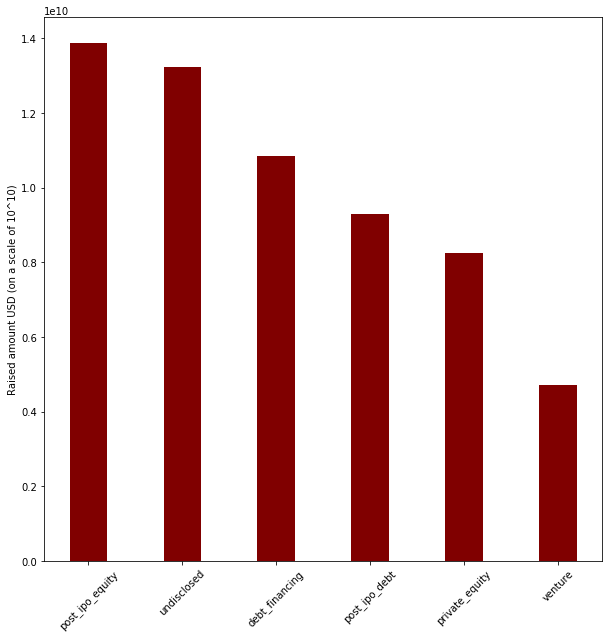

In [167]:
#Plotting a bar graph for funding type v/s amount raised
fig = plt.figure(figsize =(10, 10))
plt.bar(df2['funding_round_type'],df2['raised_amount_usd'], color ='maroon',
        width = 0.4)
plt.xticks(rotation=45)
plt.ylabel('Raised amount USD (on a scale of 10^10)')
plt.show()

In [168]:
#The most suitable funding type 
df2[df2['raised_amount_usd']==df2['raised_amount_usd'].max()]

,funding_round_type,raised_amount_usd
2,post_ipo_equity,13864943639


In [169]:
#filtering the merged dataframe to filter out the dataframe rows where funding_round_type is "post_ipo_equity"
df3 = df[df['funding_round_type']=='post_ipo_equity']

df4 = df3.groupby('country_code', as_index=False)[['country_code','raised_amount_usd']].aggregate(sum)

df4['raised_amount_usd'] = df4['raised_amount_usd'].astype('int')
df4 = df4.sort_values('raised_amount_usd',ascending=False)
df4.head(5)

,country_code,raised_amount_usd
0,USA,3200000000


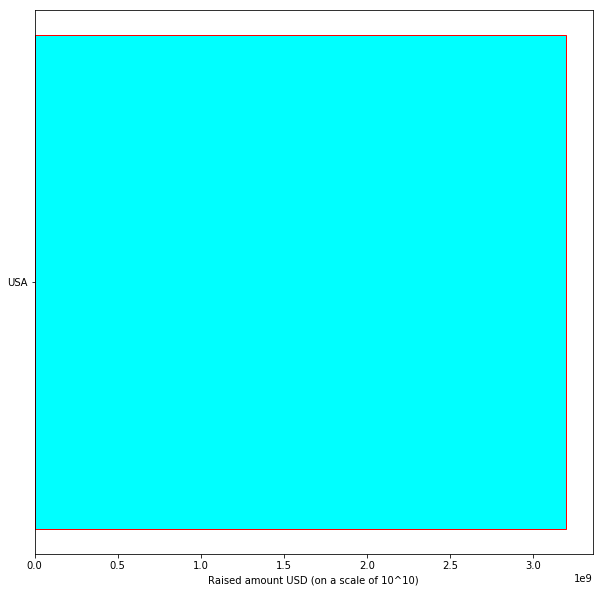

In [170]:
#horizontal bar graph displaying the top 5 countries with the most raised amount in post_ipo_equity round
fig = plt.figure(figsize =(10, 10))
plt.barh(df4['country_code'].head(5),df4['raised_amount_usd'].head(5), color='cyan', edgecolor = 'red')
plt.xlabel('Raised amount USD (on a scale of 10^10)')
plt.show()

In [171]:
#calculating the category_list(pipe separated sectors) wise sum of total raised amount in post_ipo_equity round for USA
df5 = df3[df3['country_code']=='USA']
df5 = df5.groupby('category_list', as_index=False)[['category_list','raised_amount_usd']].aggregate(sum)
df5['raised_amount_usd'] = df5['raised_amount_usd'].astype('int')
df5 = df5.sort_values('raised_amount_usd',ascending=False)

df5

,category_list,raised_amount_usd
0,Internet|Mobile,3200000000


In [172]:
#spliting the pipe separated category list column in separate rows to calculate sector wise total funding in post_ipo_equity round
df_sec = pd.DataFrame(df5.category_list.str.split('|').tolist(), index=([df5.raised_amount_usd])).stack()
df_sec = df_sec.reset_index()[[0, 'raised_amount_usd']]
df_sec.columns = ['sectors', 'raised_amount_usd']
df_sec = df_sec.groupby('sectors', as_index=False)[['sectors','raised_amount_usd']].aggregate(sum)

df_sec = df_sec.sort_values('raised_amount_usd',ascending=False)
df_sec

,sectors,raised_amount_usd
0,Internet,3200000000
1,Mobile,3200000000


Text(0,0.5,'Raised amount USD (on a scale of 10^10)')

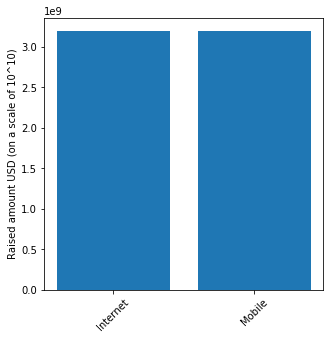

In [173]:
#Plotting bar graph for top 3 funded sectors in USA in the post_ipo_equity round

fig = plt.figure(figsize =(5, 5))

res_df = display_country_wise_sector(coun)
plt.bar(res_df['sectors'].head(3),res_df['raised_amount_usd'].head(3))
plt.xticks(rotation=45)

plt.ylabel('Raised amount USD (on a scale of 10^10)')

# Analyzing for cluster 3


In [174]:
# Analyzing for cluster 3

df = merged_df[merged_df.cluster==3]
df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,cluster
745,/organization/58-com,/funding-round/0c48df8f23ec73f69a1127c567835d01,post_ipo_equity,NaN,27-06-2014,7.360000e+08,58.com,http://www.58.com,Curated Web|Internet|Software,ipo,CHN,19,CHN - Other,Chaoyang,01-01-2005,3
1205,/organization/ability-network,/funding-round/9d34e0f1355429507610348f546310f9,private_equity,NaN,07-04-2014,5.500000e+08,ABILITY Network,http://www.abilitynetwork.com,Health Care,operating,USA,MN,Minneapolis,Minneapolis,01-01-2000,3
1271,/organization/abound-solar,/funding-round/fdd138f12ee59901d7f8b8e65cb12ce5,grant,NaN,06-07-2010,4.000000e+08,Abound Solar,http://www.abound.com,Clean Technology|Solar,closed,USA,CO,CO - Other,Loveland,01-01-2007,3
1304,/organization/abril,/funding-round/3ac2316a240a8405c305802b0d120410,private_equity,NaN,09-05-2006,4.220000e+08,Abril,http://www.abril.com.br,Advertising|Digital Media|Education|Media|News...,operating,BRA,2,Sao Paulo,São Paulo,01-01-1950,3
1829,/organization/act-atria-convergence-technologi...,/funding-round/24668e35016df4e57f182a1e6645ce5d,undisclosed,NaN,01-07-2015,5.000000e+08,ACT (Atria Convergence Technologies Pvt. Ltd.),http://www.acttv.in/index.php,Internet Service Providers|Networking,operating,IND,19,Bangalore,Bangalore,01-01-2008,3
2539,/organization/admi-holdings,/funding-round/f9908e6973989f77720af5d0c601cfbc,venture,NaN,20-10-2010,3.676450e+08,ADMI Holdings,NaN,Finance|Investment Management,operating,USA,CA,Los Angeles,Los Angeles,01-01-2010,3
3765,/organization/airbnb,/funding-round/48ab76afc274d36dddf8a1e26fca313e,venture,D,16-04-2014,4.750000e+08,Airbnb,http://airbnb.com,Hotels|Travel,operating,USA,CA,SF Bay Area,San Francisco,01-08-2008,3
3766,/organization/airbnb,/funding-round/8ab0470b7e24485f60b57ad0378ba13a,private_equity,NaN,28-06-2015,1.500000e+09,Airbnb,http://airbnb.com,Hotels|Travel,operating,USA,CA,SF Bay Area,San Francisco,01-08-2008,3
4258,/organization/alere,/funding-round/91883e56891e7e59a3e8862bf9a4d136,debt_financing,NaN,21-09-2010,4.000000e+08,Alere,http://www.alere.com,Hardware + Software|Health Care|Health Diagnos...,acquired,USA,MA,Boston,Waltham,01-01-1981,3
4365,/organization/alibaba,/funding-round/1073dbd198693a8e1e9e2a0c66f5cd11,private_equity,NaN,11-08-2005,1.000000e+09,Alibaba,http://www.alibaba.com,E-Commerce,ipo,CHN,2,Hangzhou,Hangzhou,01-06-1999,3


In [175]:
#displaying the third highest raised amount in each funding round type for each cluster 
df1 = df.sort_values('raised_amount_usd',ascending=False).groupby('funding_round_type')[['raised_amount_usd']].nth(2)

df1['raised_amount_usd'] = df1['raised_amount_usd'].astype('int')

df1

,raised_amount_usd
funding_round_type,
debt_financing,1500000000
grant,400000000
post_ipo_debt,1000000000
post_ipo_equity,1200000000
private_equity,1600000000
undisclosed,500000000
venture,1100000000


In [176]:
# Grouping the data on type of funding and calculating sum of raised amount for each funding type 
df2 = df.groupby('funding_round_type', as_index=False)[['funding_round_type','raised_amount_usd']].aggregate(sum)
df2 = df2.sort_values('raised_amount_usd',ascending=False)

In [177]:
#Displaying the funding type with the respective raised amounts in decreasing order 
df2['raised_amount_usd'] = df2['raised_amount_usd'].astype('int')
df2

,funding_round_type,raised_amount_usd
5,private_equity,46755953801
8,venture,37819786309
1,debt_financing,32062104563
4,post_ipo_equity,19381479395
3,post_ipo_debt,10915750000
7,undisclosed,4110000000
2,grant,1562000000
6,secondary_market,1080611554
0,angel,494511992


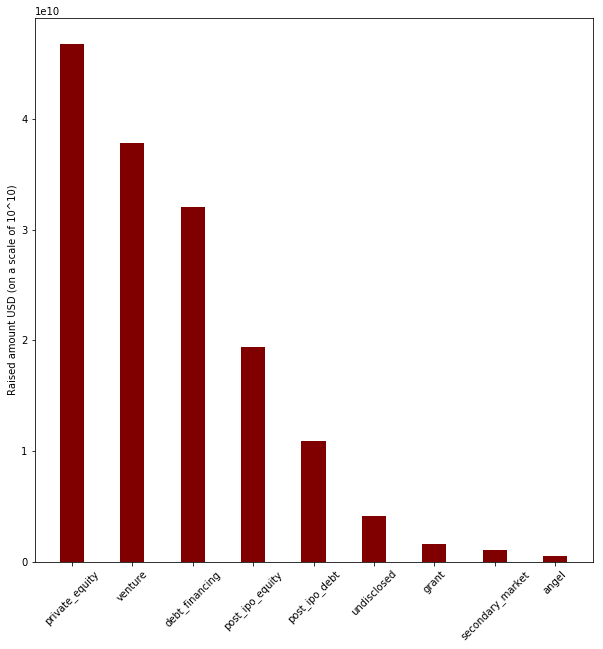

In [178]:
#Plotting a bar graph for funding type v/s amount raised
fig = plt.figure(figsize =(10, 10))
plt.bar(df2['funding_round_type'],df2['raised_amount_usd'], color ='maroon',
        width = 0.4)
plt.xticks(rotation=45)
plt.ylabel('Raised amount USD (on a scale of 10^10)')
plt.show()

In [179]:
#The most suitable funding type 
df2[df2['raised_amount_usd']==df2['raised_amount_usd'].max()]

,funding_round_type,raised_amount_usd
5,private_equity,46755953801


In [180]:
#filtering the merged dataframe to filter out the dataframe rows where funding_round_type is "private_equity"
df3 = df[df['funding_round_type']=='private_equity']

df4 = df3.groupby('country_code', as_index=False)[['country_code','raised_amount_usd']].aggregate(sum)

df4['raised_amount_usd'] = df4['raised_amount_usd'].astype('int')
df4 = df4.sort_values('raised_amount_usd',ascending=False)
df4.head(5)

,country_code,raised_amount_usd
15,USA,17188710363
4,CHN,12601000000
10,IND,3241000000
14,RUS,1825000000
7,GBR,1591000000


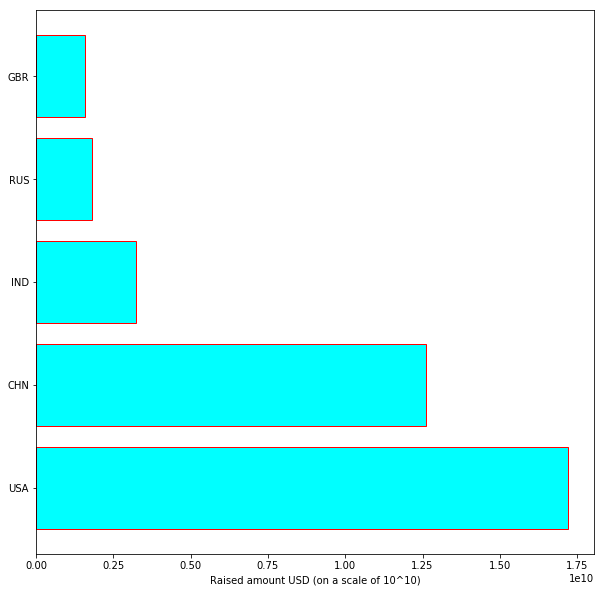

In [181]:
#horizontal bar graph displaying the top 5 countries with the most raised amount in private_equity round
fig = plt.figure(figsize =(10, 10))
plt.barh(df4['country_code'].head(5),df4['raised_amount_usd'].head(5), color='cyan', edgecolor = 'red')
plt.xlabel('Raised amount USD (on a scale of 10^10)')
plt.show()

In [182]:
#calculating the category_list(pipe separated sectors) wise sum of total raised amount in private_equity round for USA
df5 = df3[df3['country_code']=='USA']
df5 = df5.groupby('category_list', as_index=False)[['category_list','raised_amount_usd']].aggregate(sum)
df5['raised_amount_usd'] = df5['raised_amount_usd'].astype('int')
df5 = df5.sort_values('raised_amount_usd',ascending=False)

df5

,category_list,raised_amount_usd
0,All Students|Colleges|Communities|Identity|Soc...,1500000000
21,Hotels|Travel,1500000000
24,Oil and Gas,1498515340
3,Automotive|Design|Limousines|Public Transporta...,1200000000
6,Cable|Internet|Web Hosting,1050000000
1,Analytics,894184042
10,Distribution|Logistics|Storage,750000000
8,Databases|Hardware|Hardware + Software|Network...,681759114
9,Distribution|Investment Management|Retail,674598700
19,Health Care,550000000


In [183]:
#spliting the pipe separated category list column in separate rows to calculate sector wise total funding in post_ipo_equity round
df_sec = pd.DataFrame(df5.category_list.str.split('|').tolist(), index=([df5.raised_amount_usd])).stack()
df_sec = df_sec.reset_index()[[0, 'raised_amount_usd']]
df_sec.columns = ['sectors', 'raised_amount_usd']
df_sec = df_sec.groupby('sectors', as_index=False)[['sectors','raised_amount_usd']].aggregate(sum)

df_sec = df_sec.sort_values('raised_amount_usd',ascending=False)
df_sec

,sectors,raised_amount_usd
2,Automotive,1592000000
0,All Students,1500000000
48,Travel,1500000000
42,Social Media,1500000000
7,Colleges,1500000000
8,Communities,1500000000
27,Identity,1500000000
26,Hotels,1500000000
37,Oil and Gas,1498515340
44,Storage,1431759114


Text(0,0.5,'Raised amount USD (on a scale of 10^10)')

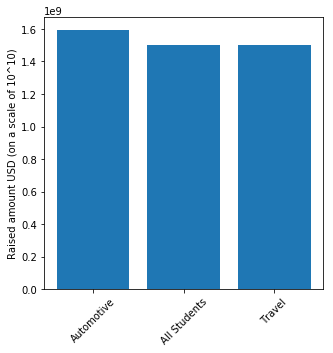

In [184]:
#Plotting bar graph for top 3 funded sectors in USA in the post_ipo_equity round

fig = plt.figure(figsize =(5, 5))

res_df = display_country_wise_sector(coun)
plt.bar(res_df['sectors'].head(3),res_df['raised_amount_usd'].head(3))
plt.xticks(rotation=45)

plt.ylabel('Raised amount USD (on a scale of 10^10)')